In [1]:
#author: wk, last modified: 20.02.2020
#Introduction to the General Circulation of the Atmosphere course, week 2/B +3/C exercise

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [3]:
from glob import glob

files = sorted(glob('/Users/Fairy/Desktop/General_Circulation/ERA5_data/*.nc'))
files

['/Users/Fairy/Desktop/General_Circulation/ERA5_data/ERA5_pressure_levels_2x2.nc']

In [4]:
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset>
Dimensions:  (lat: 90, level: 20, lon: 180, time: 468)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Data variables:
    z        (time, level, lat, lon) float64 ...
    q        (time, level, lat, lon) float64 ...
    t        (time, level, lat, lon) float64 ...
    u        (time, level, lat, lon) float64 ...
    v        (time, level, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Feb 13 12:48:58 2020: cdo -b F64 mergetime f1.nc f2.nc ...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [5]:
ds.z

<xarray.DataArray 'z' (time: 468, level: 20, lat: 90, lon: 180)>
[151632000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

In [8]:
ds.u

<xarray.DataArray 'u' (time: 468, level: 20, lat: 90, lon: 180)>
[151632000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [10]:
ds.v

<xarray.DataArray 'v' (time: 468, level: 20, lat: 90, lon: 180)>
[151632000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Attributes:
    standard_name:  northward_wind
    long_name:      V component of wind
    units:          m s**-1

In [12]:
u_wind_monthly_mean = ds.u.groupby('time.month').mean('time')
u_wind_monthly_mean

<xarray.DataArray 'u' (month: 12, level: 20, lat: 90, lon: 180)>
array([[[[-1.42438 , ..., -1.38818 ],
         ...,
         [-8.446705, ..., -8.268776]],

        ...,

        [[-2.894854, ..., -3.027529],
         ...,
         [-2.701931, ..., -2.662877]]],


       ...,


       [[[-3.241707, ..., -3.218909],
         ...,
         [-2.851322, ..., -2.675323]],

        ...,

        [[-2.868912, ..., -3.013873],
         ...,
         [-2.777229, ..., -2.72119 ]]]])
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [13]:
u_wind_monthly_mean_lon_mean = u_wind_monthly_mean.mean(dim='lon')
u_wind_monthly_mean_lon_mean

<xarray.DataArray 'u' (month: 12, level: 20, lat: 90)>
array([[[-0.097287, -0.275651, ...,  3.482913,  1.165864],
        [ 0.097041,  0.317065, ...,  2.219082,  0.737588],
        ...,
        [-0.283819, -2.057005, ..., -0.125499, -0.131571],
        [-0.288391, -2.055789, ..., -0.158786, -0.114116]],

       [[ 0.188713,  0.543494, ...,  3.49291 ,  1.181868],
        [ 0.345001,  0.982323, ...,  2.411457,  0.82119 ],
        ...,
        [-0.346728, -2.351951, ...,  0.156581, -0.012509],
        [-0.354947, -2.350315, ...,  0.117417, -0.012059]],

       ...,

       [[ 0.973382,  2.938306, ...,  2.844007,  0.946135],
        [ 0.587307,  1.799128, ...,  1.984449,  0.657226],
        ...,
        [-0.516587, -2.605713, ..., -0.04366 , -0.039506],
        [-0.527101, -2.603693, ..., -0.121175, -0.047273]],

       [[ 0.186026,  0.576012, ...,  3.324444,  1.110287],
        [ 0.352378,  1.043409, ...,  2.066795,  0.684048],
        ...,
        [-0.283119, -1.98268 , ..., -0.0903  , -

In [111]:
#Fig 3.6 January[0] and July[6]
fig = plt.figure(figsize=(13, 8))
img = u_wind_monthly_mean_lon_mean[0].plot.contourf(cmap=plt.cm.coolwarm, vmin=-30, vmax=30, add_colorbar=False)
img2 = u_wind_monthly_mean_lon_mean[0].plot.contour(colors='k', fmt='%1.0f', vmin=-30, vmax=30, levels=13)
plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('January Latitude-Height section of the zonal mean wind (1979-2019)')
fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

#
#cs = ax1.contour(cs, colors='k')
#ax1.clabel(cs, colors='k', fmt='%1.0f')
#ax1.coastlines()
#img.set_title('January Latitude-Height section of the zonal mean wind (1979-2019)')

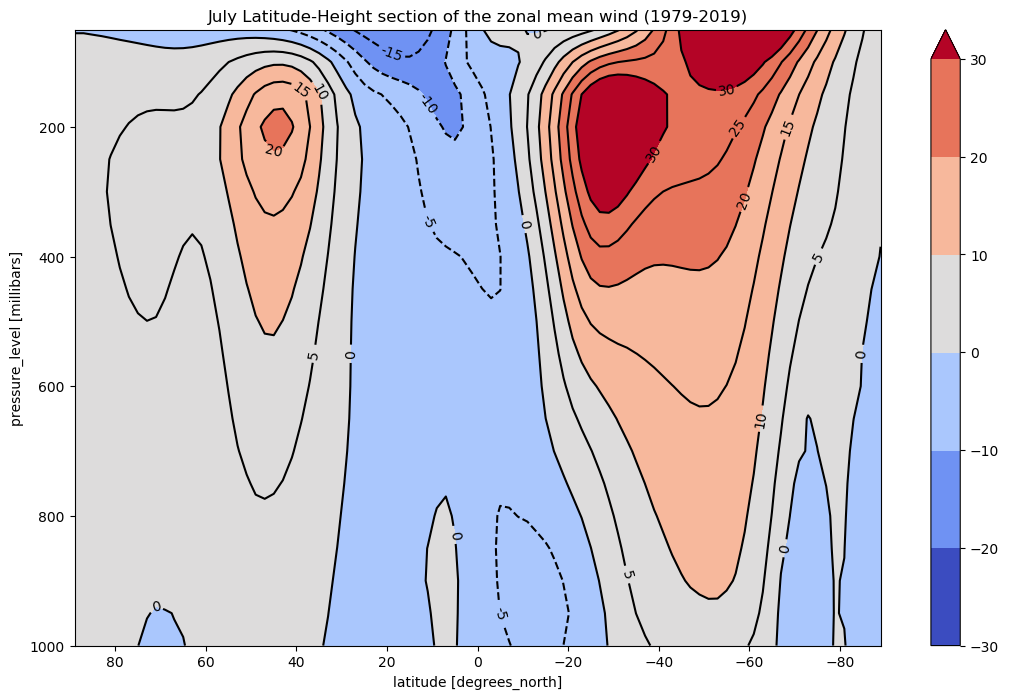

In [112]:
#Fig 3.6 January[0] and July[6]
fig = plt.figure(figsize=(13, 8))
img = u_wind_monthly_mean_lon_mean[6].plot.contourf(cmap=plt.cm.coolwarm, vmin=-30, vmax=30, add_colorbar=False)
img2 = u_wind_monthly_mean_lon_mean[6].plot.contour(colors='k', fmt='%1.0f', vmin=-30, vmax=30, levels=13)
plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('July Latitude-Height section of the zonal mean wind (1979-2019)')
fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

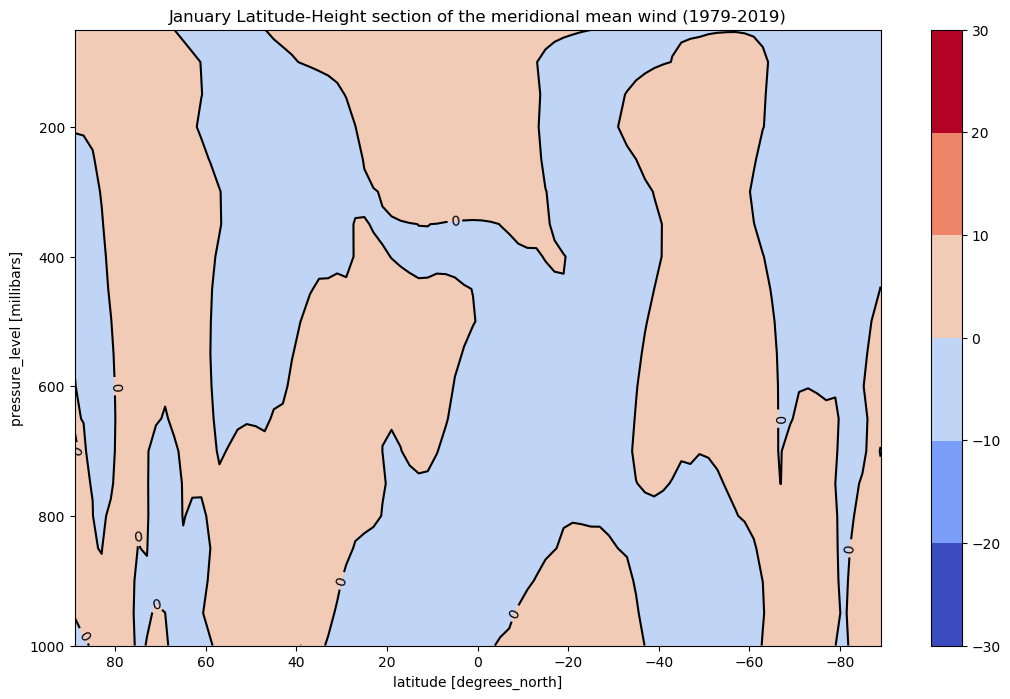

In [113]:
#Fig 3.10
v_wind_monthly_mean = ds.v.groupby('time.month').mean('time')
v_wind_monthly_mean_lon_mean = v_wind_monthly_mean.mean(dim='lon')

#Fig 3.10 January[0] and July[6]
fig = plt.figure(figsize=(13, 8))
img = v_wind_monthly_mean_lon_mean[0].plot.contourf(cmap=plt.cm.coolwarm, vmin=-30, vmax=30, add_colorbar=False)
img2 = v_wind_monthly_mean_lon_mean[0].plot.contour(colors='k', fmt='%1.0f', vmin=-30, vmax=30, levels=13)
plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('January Latitude-Height section of the meridional mean wind (1979-2019)')
fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

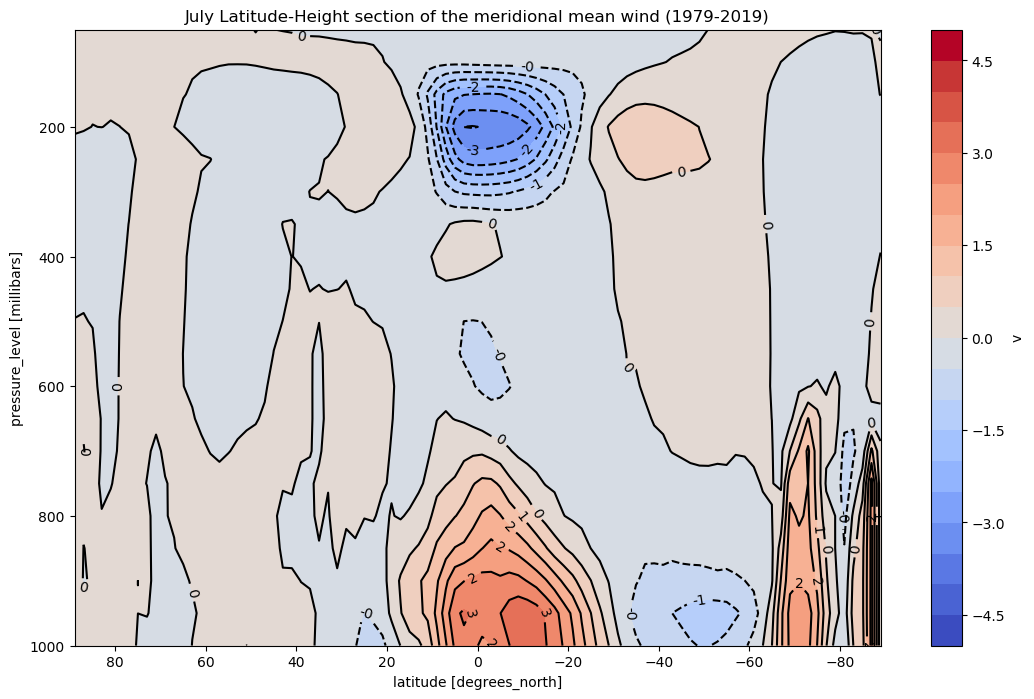

In [114]:
#Fig 3.10 January[0] and July[6]
fig = plt.figure(figsize=(13, 8))
img = v_wind_monthly_mean_lon_mean[6].plot.contourf(cmap=plt.cm.coolwarm, vmin=-5, vmax=5, levels=21)#add_colorbar=False)
img2 = v_wind_monthly_mean_lon_mean[6].plot.contour(colors='k', fmt='%1.0f', vmin=-5, vmax=5, levels=21)
plt.clabel(img2, list(np.arange(-4.5,5,0.5)), fmt='%1.0f')
#plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('July Latitude-Height section of the meridional mean wind (1979-2019)')
#fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [115]:
fig = plt.figure(figsize=(13, 8))
img = v_wind_monthly_mean_lon_mean[0].plot.contourf(cmap=plt.cm.coolwarm, vmin=-5, vmax=5, levels=21)#add_colorbar=False)
img2 = v_wind_monthly_mean_lon_mean[0].plot.contour(colors='k', fmt='%1.0f', vmin=-5, vmax=5, levels=21)
plt.clabel(img2, list(np.arange(-4.5,5,0.5)), fmt='%1.0f')
#plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('January Latitude-Height section of the meridional mean wind (1979-2019)')
#fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [116]:
#Fig 3.20 lat-height plot of zonal averaged temperature

ds.t

<xarray.DataArray 't' (time: 468, level: 20, lat: 90, lon: 180)>
[151632000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K

In [127]:
t_monthly_mean = ds.t.groupby('time.month').mean('time')
t_monthly_mean_lon_mean = t_monthly_mean.mean(dim='lon')
#t_monthly_mean_lon_mean = t_monthly_mean_lon_mean -273.15

#Fig 3.20 January[0] and July[6]
fig = plt.figure(figsize=(13, 8))
img = t_monthly_mean_lon_mean[0].plot.contourf(cmap=plt.cm.coolwarm, vmin=180, vmax=320, add_colorbar=False)
img2 = t_monthly_mean_lon_mean[0].plot.contour(colors='k', fmt='%1.0f', vmin=180, vmax=320, levels=29)
plt.clabel(img2, fmt='%1.0f')
#plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('January Latitude-Height section of the zonal averaged temperature (1979-2019)')
#fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

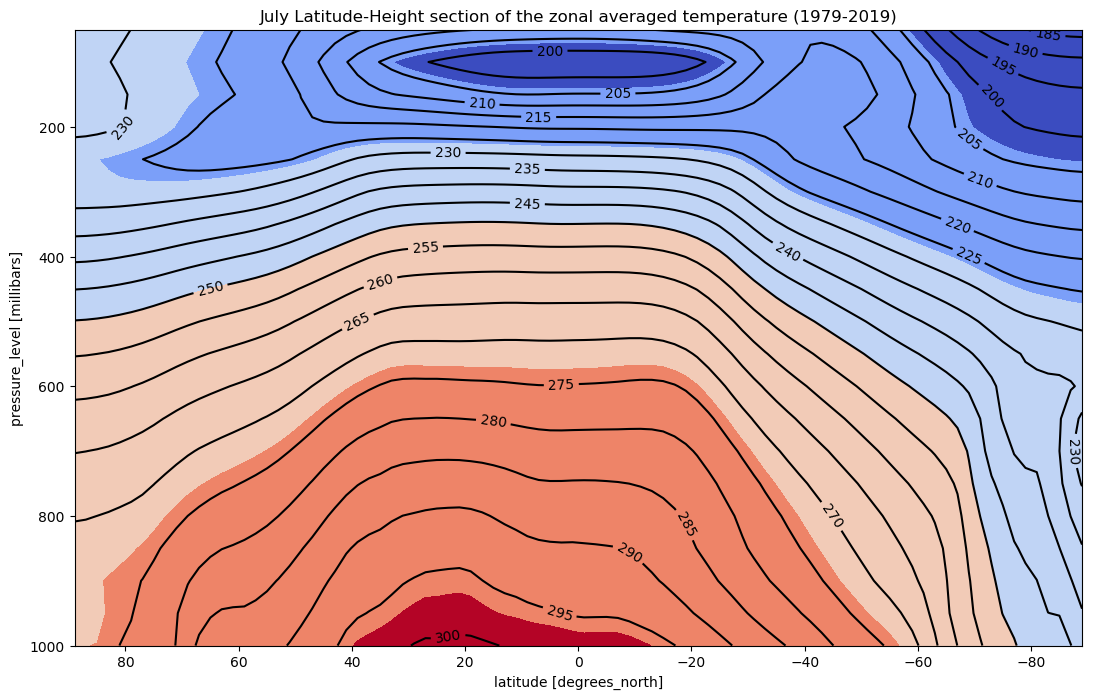

In [128]:
fig = plt.figure(figsize=(13, 8))
img = t_monthly_mean_lon_mean[6].plot.contourf(cmap=plt.cm.coolwarm, vmin=180, vmax=320, add_colorbar=False)
img2 = t_monthly_mean_lon_mean[6].plot.contour(colors='k', fmt='%1.0f', vmin=180, vmax=320, levels=29)
plt.clabel(img2, fmt='%1.0f')
#plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('July Latitude-Height section of the zonal averaged temperature (1979-2019)')
#fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [126]:
np.arange(180,320,5).shape

(28,)

In [131]:
##### Attention! WARNING
##### Below is a first draft on how to calculate the geostrphic wind from the geopotential,
##### The shape of the last two plots seems right,
##### HOWEVER, the magnitudes of the wind are way off - but maybe you can use it as inspiration :-)






#week 3/C additional plots
#1. fig 3.6 but do it solely from the geopotential height data
geopot = ds.z
geopot

<xarray.DataArray 'z' (time: 468, level: 20, lat: 90, lon: 180)>
[151632000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * level    (level) float64 50.0 100.0 150.0 200.0 ... 850.0 900.0 950.0 1e+03
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

In [132]:
#I guess we will make an approximation of the wind with the geopotential height e.g. we will 
# (the geopotential height is just = geopotential / g)
#calculate the geostrophic wind:
#coriolis:   f = 2⋅Ω⋅sin(φ)
# Ω is the earth's rotation and φ is the latitude. 
#The earth's rotation Ω has the value 7.292 x 10-5sec-1
#For figure 3.6 we want to estimate u (zonal wind) -> u_g
#  u_g⋅f = −g⋅(∂Φ/∂y) or also  ug⋅f = −g⋅(ΔΦ/Δy)
# Δy = 1° Latitude = 1.11x10**5 meters
# g = 9.8m⋅sec-2 
#u_g = −(g/f)⋅(1/r)⋅(∂Φ/∂φ), where r is the radius of the eart r=6.37x106 m 
#equation per lat/lon coordinate, not used here, as we use zonal average


#we calculate u_g for all latitudes and all pressure levels

geopot_time_mean = geopot.groupby('time.month').mean('time')
geopot_time_lon_mean = geopot_time_mean.mean(dim='lon')

Omega = 7.292*(10**(-5))
#f = 2*Omega*np.sin(np.deg2rad(lat))

geopot_time_lon_mean

<xarray.DataArray 'z' (month: 12, level: 20, lat: 90)>
array([[[ 2.019625e+05,  2.019566e+05, ...,  1.887672e+05,  1.886916e+05],
        [ 1.554611e+05,  1.554679e+05, ...,  1.483400e+05,  1.482934e+05],
        ...,
        [ 4.053074e+03,  3.960100e+03, ...,  4.669648e+03,  4.672403e+03],
        [ 1.147997e+02,  2.040651e+01, ...,  9.968282e+02,  9.998560e+02]],

       [[ 2.002651e+05,  2.002771e+05, ...,  1.905442e+05,  1.904683e+05],
        [ 1.544079e+05,  1.544298e+05, ...,  1.491425e+05,  1.490913e+05],
        ...,
        [ 3.917119e+03,  3.786258e+03, ...,  4.731735e+03,  4.727661e+03],
        [ 2.866069e+01, -1.080993e+02, ...,  1.068920e+03,  1.065719e+03]],

       ...,

       [[ 1.908973e+05,  1.909625e+05, ...,  1.924615e+05,  1.923990e+05],
        [ 1.479327e+05,  1.479717e+05, ...,  1.509315e+05,  1.508888e+05],
        ...,
        [ 3.701058e+03,  3.571826e+03, ...,  4.777087e+03,  4.777031e+03],
        [-1.922268e+02, -3.253750e+02, ...,  1.049130e+03,  1.05

In [187]:
g = 9.8
Omega = 7.292*(10**(-5))
dlat = 2 * 1.11*(10**5) #since 2x2 grid the distance between two grid points will always be 2 degree, we don't need to calculate this below
#we shift our lat coordinates with one degree, since we actually calculate u_g between the gridpoints, so we will ad sin(lat[0]+1), 
#when we calculate the value between lat[0] and lat[1]
#we will need to add +1 to the u_g.lat dimension later as well! Otherwise our plots will be off by 1 degree..
u_g_lat = np.zeros(89)
u_g_p = geopot_time_lon_mean.level #pressure dimension for u_g, since u_g is a normal numpy array and not an xarray Dataset
u_g = np.zeros([12, 20, 89])
for i in range(0,len(geopot_time_lon_mean.lat)-1):
    f = 2*Omega*np.sin(np.deg2rad(geopot_time_lon_mean.lat[i] +1))
    u_g[:,:,i] = (-g/f) * ((geopot_time_lon_mean[:,:,i+1] - geopot_time_lon_mean[:,:,i])/ dlat * g)
    u_g_lat[i] = geopot_time_lon_mean.lat[i] +1


In [188]:
#we create a new xarray DataArray for u_g :
#This will help us with plotting and keeping a nice overview of the data structure.
u_g_p = geopot_time_lon_mean.level.values
months = geopot_time_lon_mean.month.values
ug = xr.DataArray(u_g, coords=[months, u_g_p, u_g_lat], dims=['month', 'level', 'lat'])
ug

<xarray.DataArray (month: 12, level: 20, lat: 89)>
array([[[-1.762936e+01, -3.390131e+01, ...,  4.467907e+02,  2.244970e+02],
        [ 2.008579e+01,  4.061740e+01, ...,  2.801036e+02,  1.384266e+02],
        ...,
        [-2.759613e+02, -3.922101e+02, ...,  2.744374e+00, -8.177713e+00],
        [-2.801740e+02, -3.988341e+02, ..., -6.626725e-01, -8.986911e+00]],

       [[ 3.564191e+01,  6.965560e+01, ...,  4.425293e+02,  2.253820e+02],
        [ 6.493982e+01,  1.251301e+02, ...,  2.977127e+02,  1.520394e+02],
        ...,
        [-3.884187e+02, -3.670634e+02, ...,  3.400382e+01,  1.209090e+01],
        [-4.059254e+02, -3.542494e+02, ...,  2.868069e+01,  9.500365e+00]],

       ...,

       [[ 1.934953e+02,  3.902390e+02, ...,  3.700169e+02,  1.855427e+02],
        [ 1.157767e+02,  2.340229e+02, ...,  2.540597e+02,  1.267426e+02],
        ...,
        [-3.835818e+02, -4.117197e+02, ...,  9.457874e+00,  1.661846e-01],
        [-3.952050e+02, -4.009024e+02, ..., -7.355895e+00, -9.348381

In [189]:
#Fig 3.6 January[0] and July[6] for ug
fig = plt.figure(figsize=(13, 8))
img = ug[0].plot.contourf(cmap=plt.cm.coolwarm, vmin=-30, vmax=30, add_colorbar=False)
img2 = ug[0].plot.contour(colors='k', fmt='%1.0f', vmin=-30, vmax=30, levels=13)
plt.clabel(img2, [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30], fmt='%1.0f')
#img2.clabel(u_wind_monthly_mean_lon_mean[0], colors='k', fmt='%1.0f')
plt.title('January Latitude-Height section of the zonal mean wind - geostrophic wind approximation (1979-2019)')
fig.colorbar(img, ticks=[-30, -20, -10, 0, 10, 20, 30])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

/anaconda3/envs/gen_circ/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'fmt'
  s)


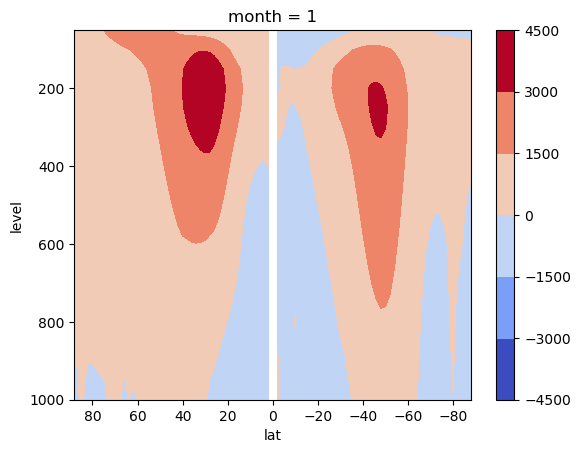

In [190]:
ug[0].plot.contourf(cmap=plt.cm.coolwarm)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

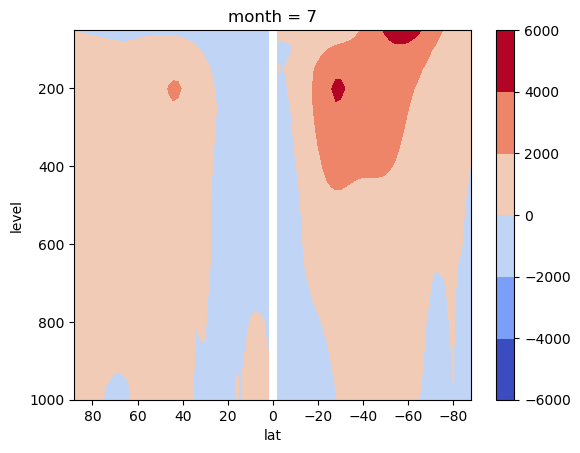

In [191]:
ug[6].plot.contourf(cmap=plt.cm.coolwarm)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()